In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436590

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436590

In [9]:
model = keras.models.load_model('modelos/modeloGeneral_completo/stacked_NO_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436590

13644/13644 [==============================] - 207s 15ms/step


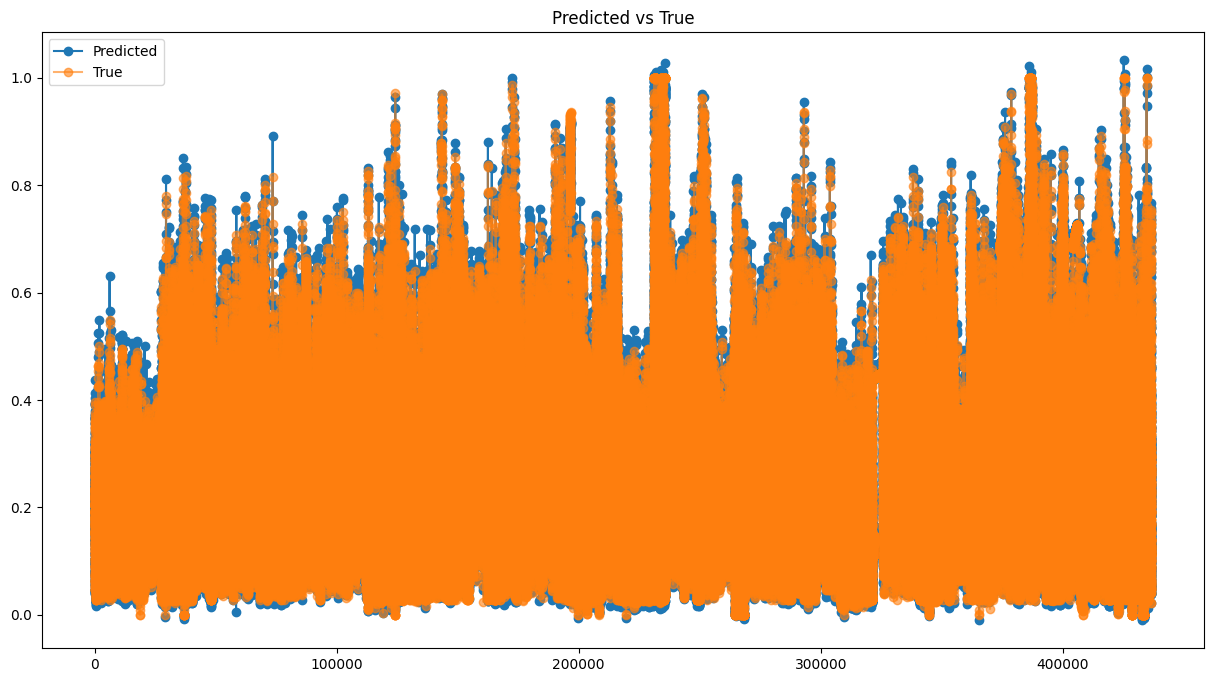

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.029033829118189133,
 'mse': 0.039461656421031534,
 'rmse': 0.0015572223274915391}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          146.925903
1          147.706787
2          143.678268
3          146.189804
4          143.061417
...               ...
436585      84.769341
436586     142.663055
436587     174.143005
436588     208.666122
436589     205.840790

[436590 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436585          137.0
436586          177.0
436587          198.0
436588          216.0
436589          233.0

[436590 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  146.925903
2023-01-01 00:15:00   140.0  147.706787
2023-01-01 00:30:00   139.0  143.678268
2023-01-01 00:45:00   145.0  146.189804
2023-01-01 01:00:00   159.0  143.061417
...                     ...         ...
2035-06-14 18:15:00   137.0   84.769341
2035-06-14 18:30:00   177.0  142.663055
2035-06-14 18:45:00   198.0  174.143005
2035-06-14 19:00:00   216.0  208.666122
2035-06-14 19:15:00   233.0  205.840790

[436590 rows x 2 columns]

AP, BE, EP: (0.9061130720196798, 0.06951618112229122, 0.02437074685802895)


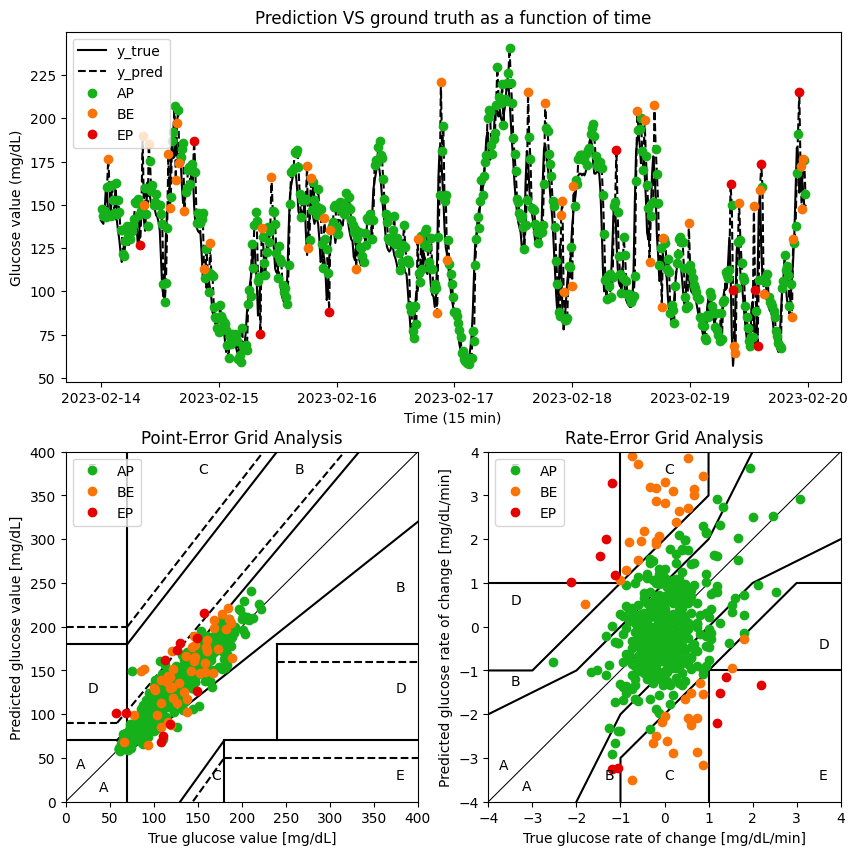

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-14 00:00:00   141.0  146.925903       NaN       NaN    NaN   
1      2023-02-14 00:15:00   140.0  147.706787 -0.066667  0.052059     AP   
2      2023-02-14 00:30:00   139.0  143.678268 -0.066667 -0.268568     AP   
3      2023-02-14 00:45:00   145.0  146.189804  0.400000  0.167436     AP   
4      2023-02-14 01:00:00   159.0  143.061417  0.933333 -0.208559     AP   
...                    ...     ...         ...       ...       ...    ...   
436585 2035-07-28 18:15:00   137.0   84.769341  2.333333  0.041461     BE   
436586 2035-07-28 18:30:00   177.0  142.663055  2.666667  3.859581     AP   
436587 2035-07-28 18:45:00   198.0  174.143005  1.400000  2.098663     AP   
436588 2035-07-28 19:00:00   216.0  208.666122  1.200000  2.301541     AP   
436589 2035-07-28 19:15:00   233.0  205.840790  1.133333 -0.188356     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     B  
...      ...   ...  
436585     B    lD  
436586     A     A  
436587     A     A  
436588     A     A  
436589     A     B  

[436590 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 79ms/step


Glucose level Predict  Glucose level True
0               0.232448            0.219565
1               0.234145            0.217391

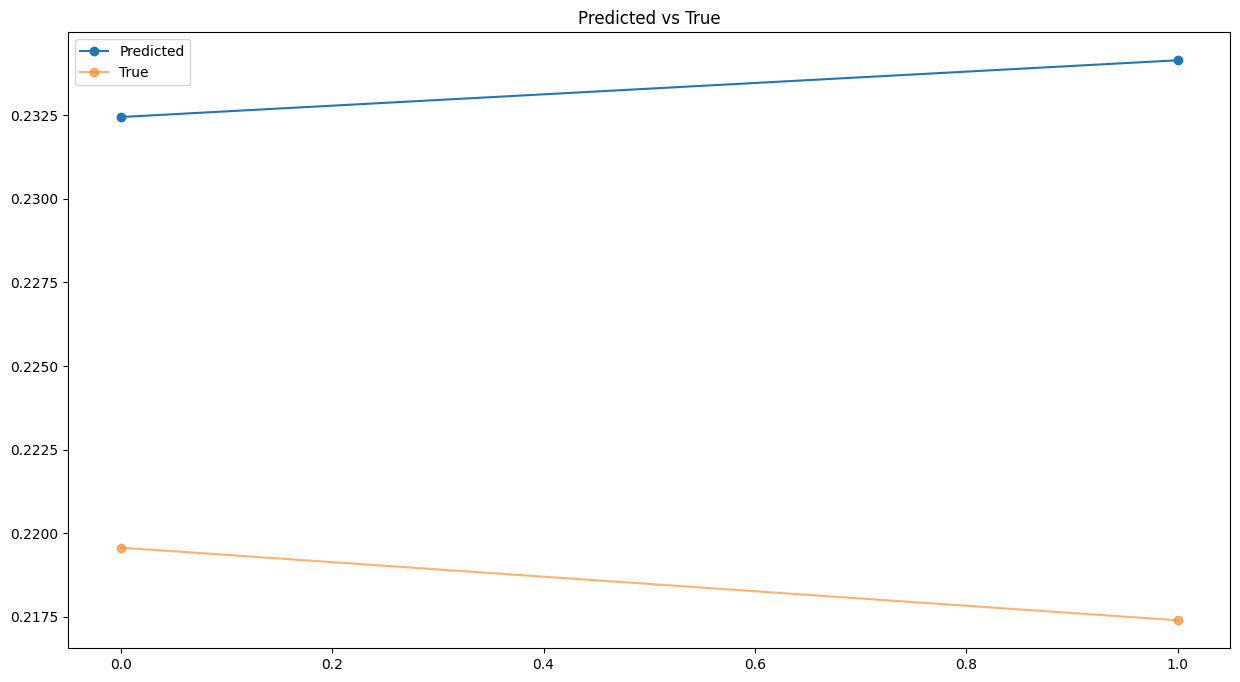

{'mae': 0.014818148379740492,
 'mse': 0.01494405340557315,
 'rmse': 0.00022332473218862245}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             146.925903               141.0
1             147.706802               140.0

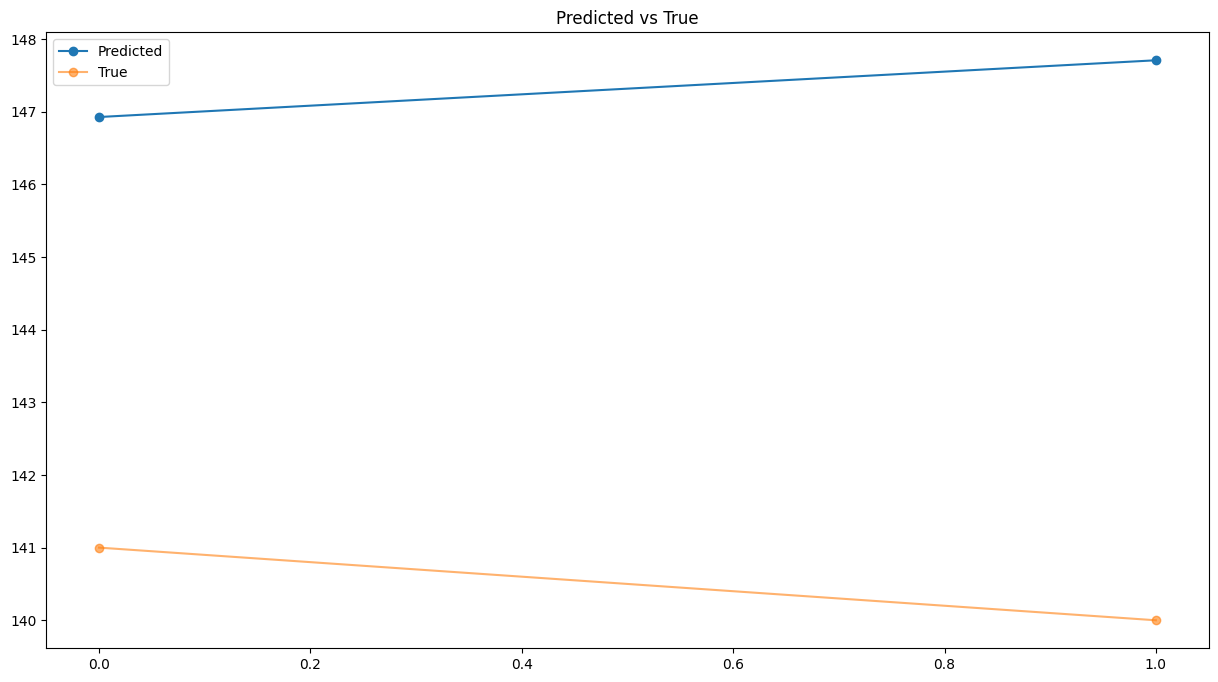

{'mae': 6.816352844238281, 'mse': 6.87426843029969, 'rmse': 47.25556645181496}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 55ms/step


Glucose level Predict  Glucose level True
0               0.232448            0.219565
1               0.253625            0.217391

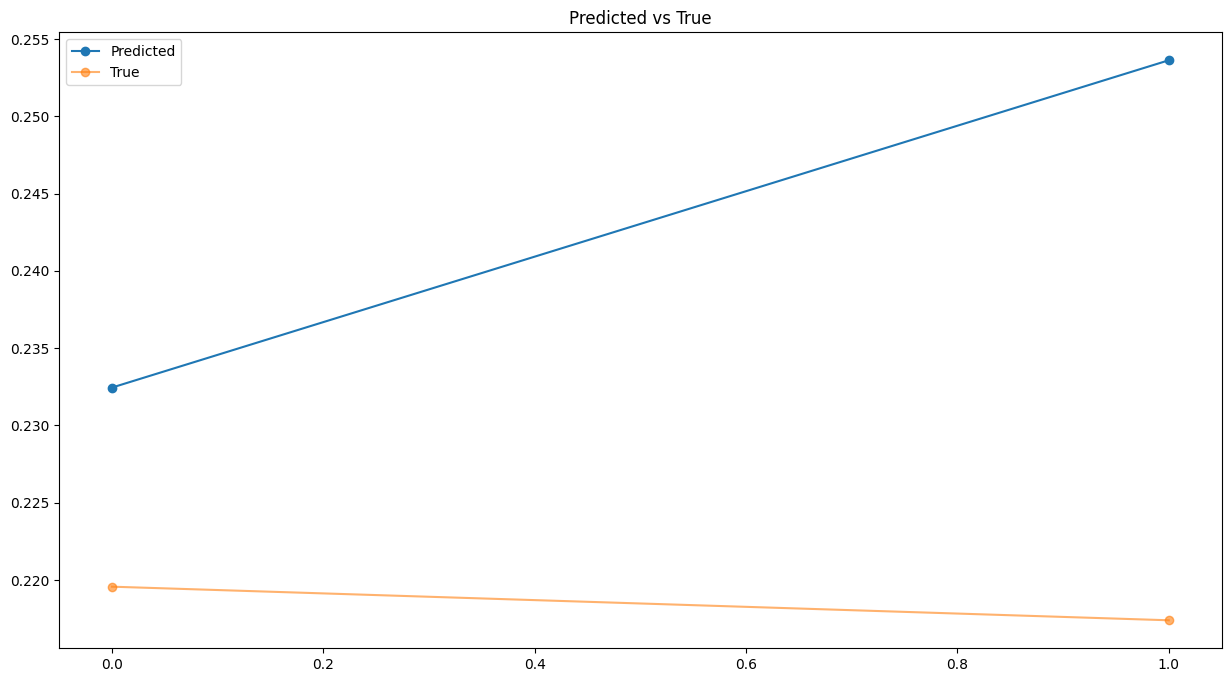

{'mae': 0.024557927315649764,
 'mse': 0.027192105782214336,
 'rmse': 0.0007394106168711343}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             146.925888               141.0
1             156.667404               140.0

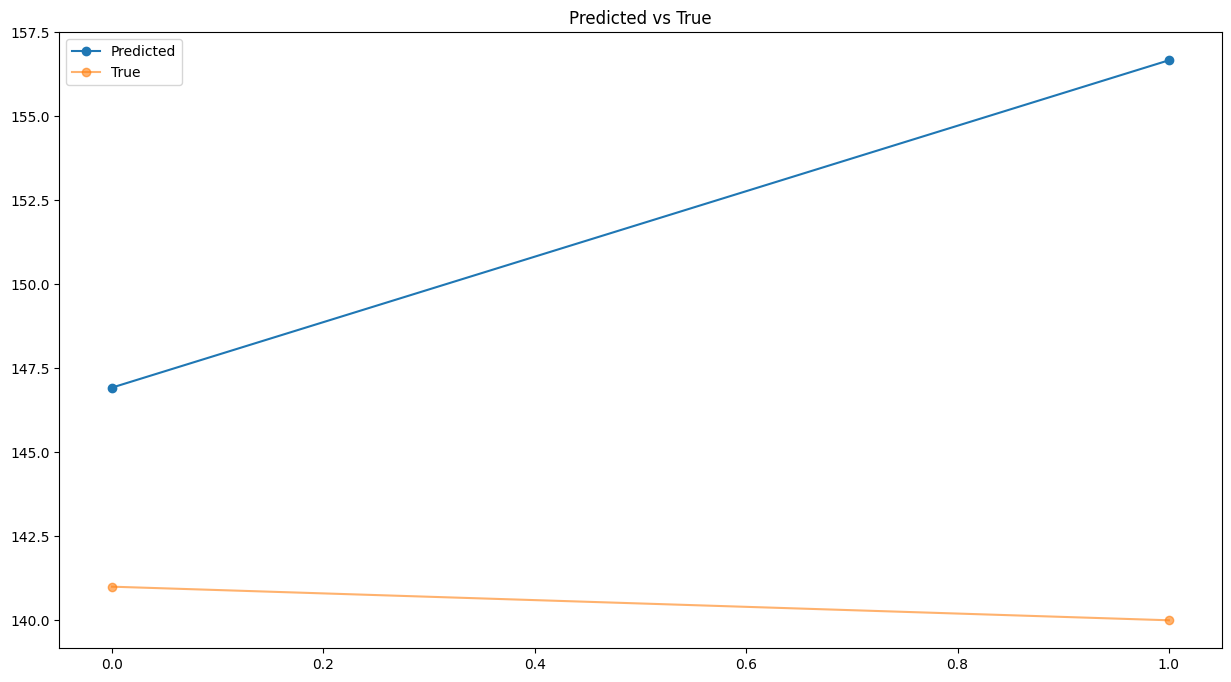

{'mae': 11.296646118164062,
 'mse': 12.508367424328458,
 'rmse': 156.45925562200136}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 10ms/step


Glucose level Predict  Glucose level True
0               0.288683            0.182609
1               0.242933            0.154348
2               0.148534            0.152174
3               0.174593            0.150000
4               0.161276            0.123913

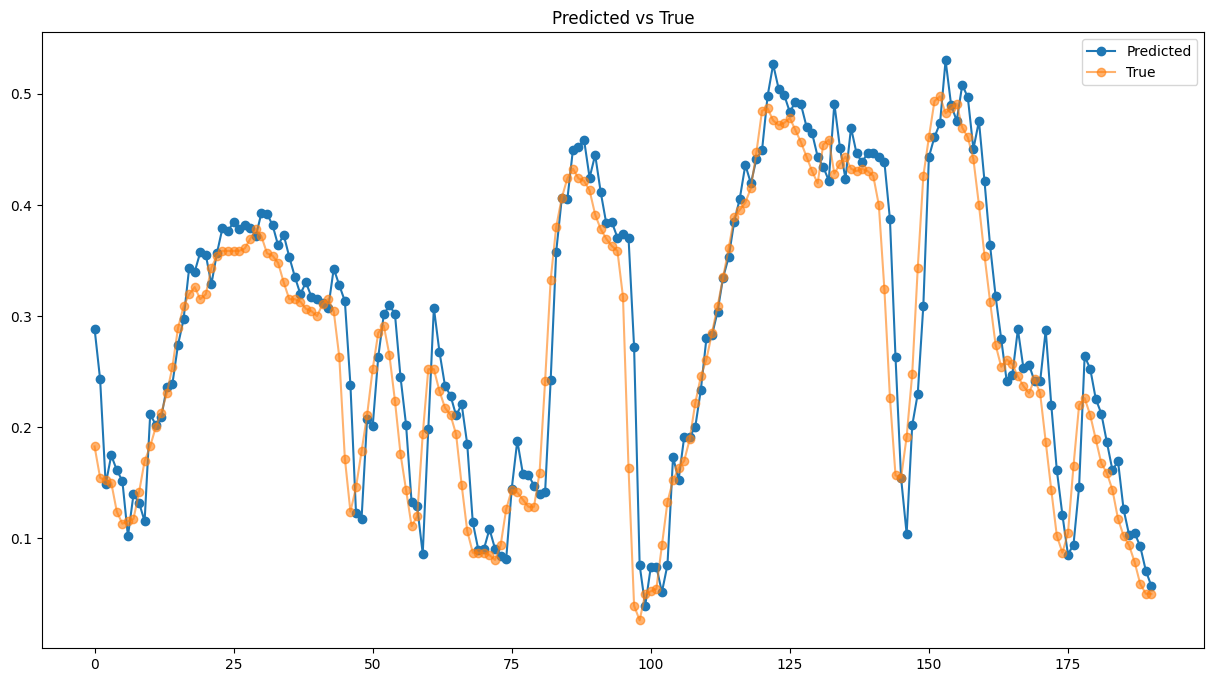

{'mae': 0.034745356109821796,
 'mse': 0.04907552166913159,
 'rmse': 0.002408406827097404}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

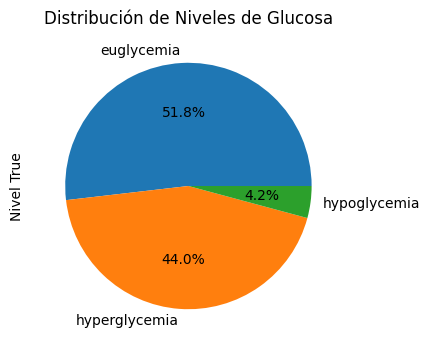

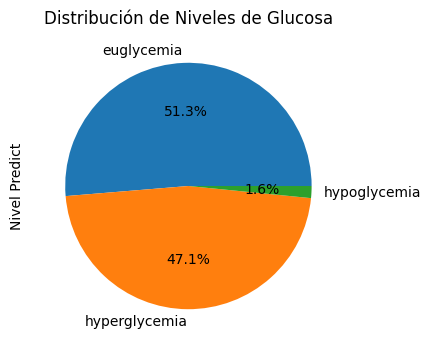

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             172.794296    euglycemia
1               111.0  euglycemia             151.749329    euglycemia
2               110.0  euglycemia             108.325630    euglycemia
3               109.0  euglycemia             120.312782    euglycemia
4                97.0  euglycemia             114.186852    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


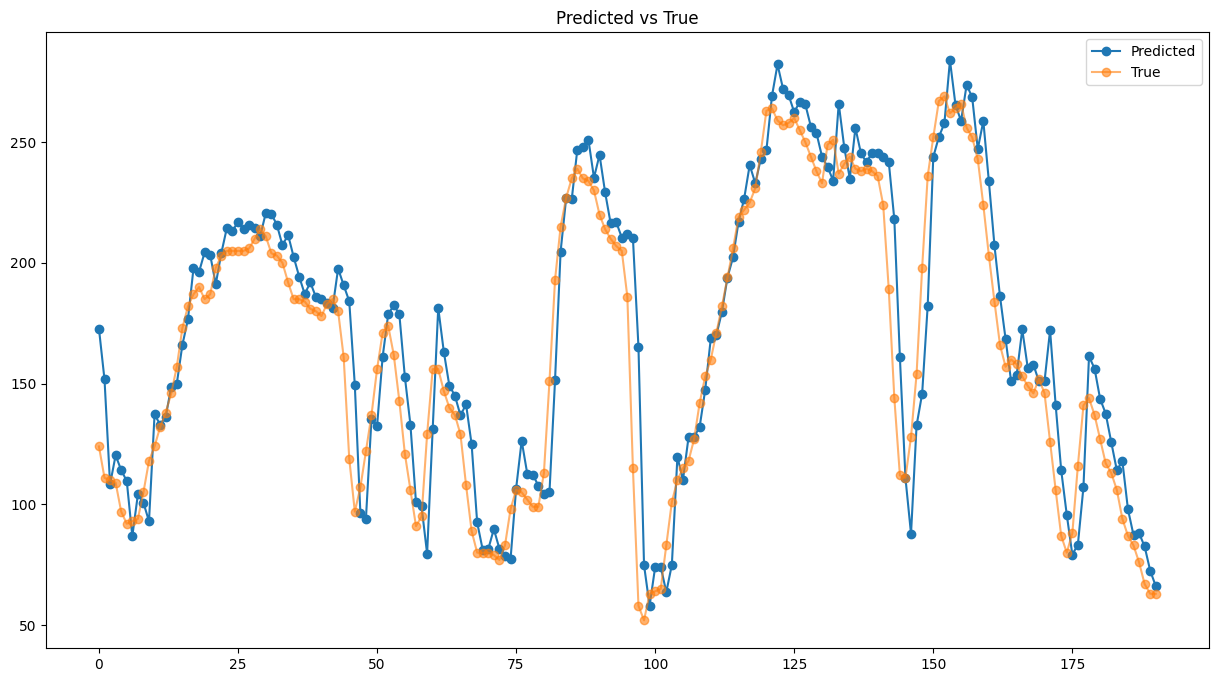

{'mae': 15.982864359910575,
 'mse': 22.574740553585347,
 'rmse': 509.61891106169077}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  172.794296
2023-01-01 00:15:00   111.0  151.749329
2023-01-01 00:30:00   110.0  108.325630
2023-01-01 00:45:00   109.0  120.312782
2023-01-01 01:00:00    97.0  114.186852
...                     ...         ...
2023-01-02 22:30:00    83.0   87.284416
2023-01-02 22:45:00    76.0   88.080322
2023-01-02 23:00:00    67.0   82.563286
2023-01-02 23:15:00    63.0   72.552780
2023-01-02 23:30:00    63.0   66.149895

[191 rows x 2 columns]

AP, BE, EP: (0.8894736842105263, 0.07894736842105263, 0.031578947368421054)


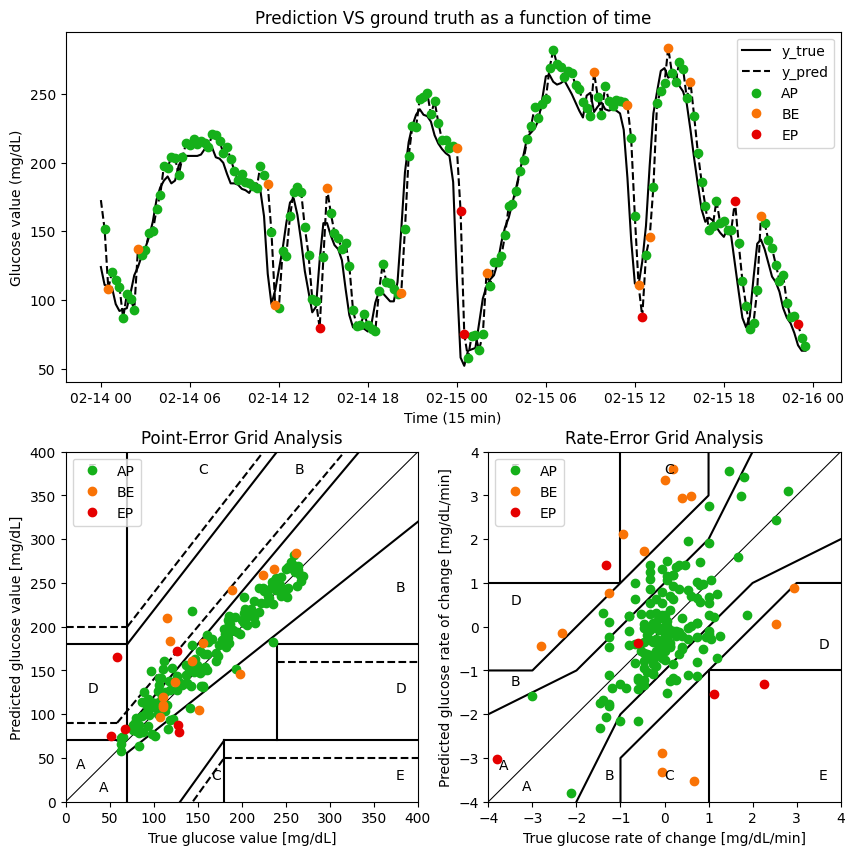

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 1s 17ms/step


Glucose level Predict  Glucose level True
0               0.341993            0.373913
1               0.394682            0.400000
2               0.402218            0.404348
3               0.442991            0.406522
4               0.418839            0.397826

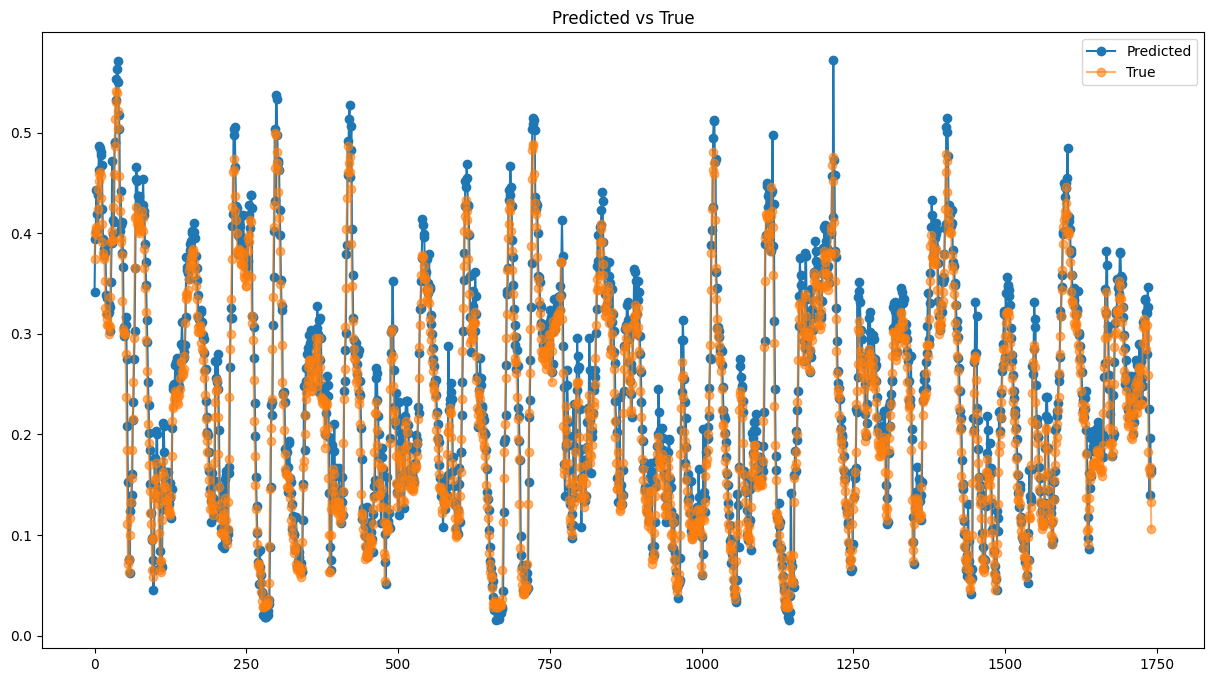

{'mae': 0.025516604594724514,
 'mse': 0.032285508515885415,
 'rmse': 0.0010423540601293096}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

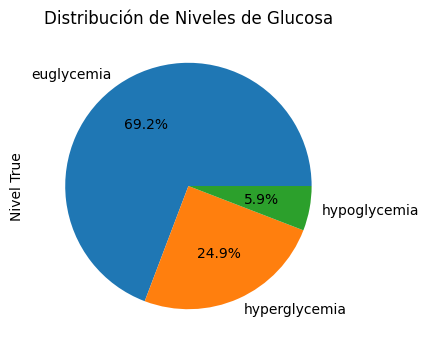

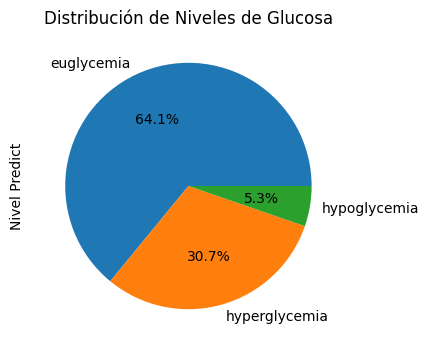

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             197.316711  hyperglycemia
1               224.0  hyperglycemia             221.553665  hyperglycemia
2               226.0  hyperglycemia             225.020050  hyperglycemia
3               227.0  hyperglycemia             243.775757  hyperglycemia
4               223.0  hyperglycemia             232.666092  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


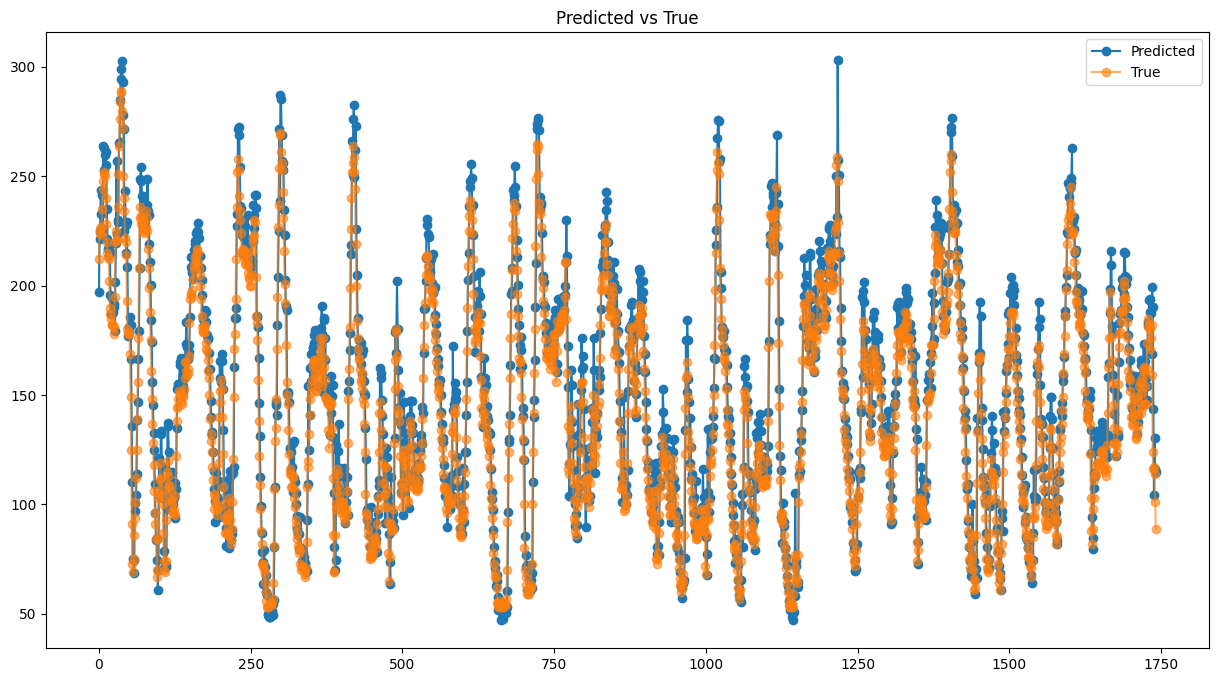

{'mae': 11.73763892242747,
 'mse': 14.85133472868376,
 'rmse': 220.56214322340836}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  197.316711
2023-01-01 00:15:00   224.0  221.553665
2023-01-01 00:30:00   226.0  225.020050
2023-01-01 00:45:00   227.0  243.775757
2023-01-01 01:00:00   223.0  232.666092
...                     ...         ...
2023-01-19 02:15:00   116.0  143.436371
2023-01-19 02:30:00   117.0  104.394600
2023-01-19 02:45:00   114.0  130.293533
2023-01-19 03:00:00   101.0  116.108597
2023-01-19 03:15:00    89.0  114.615265

[1742 rows x 2 columns]

AP, BE, EP: (0.9483055715106261, 0.043653072946582425, 0.0080413555427915)


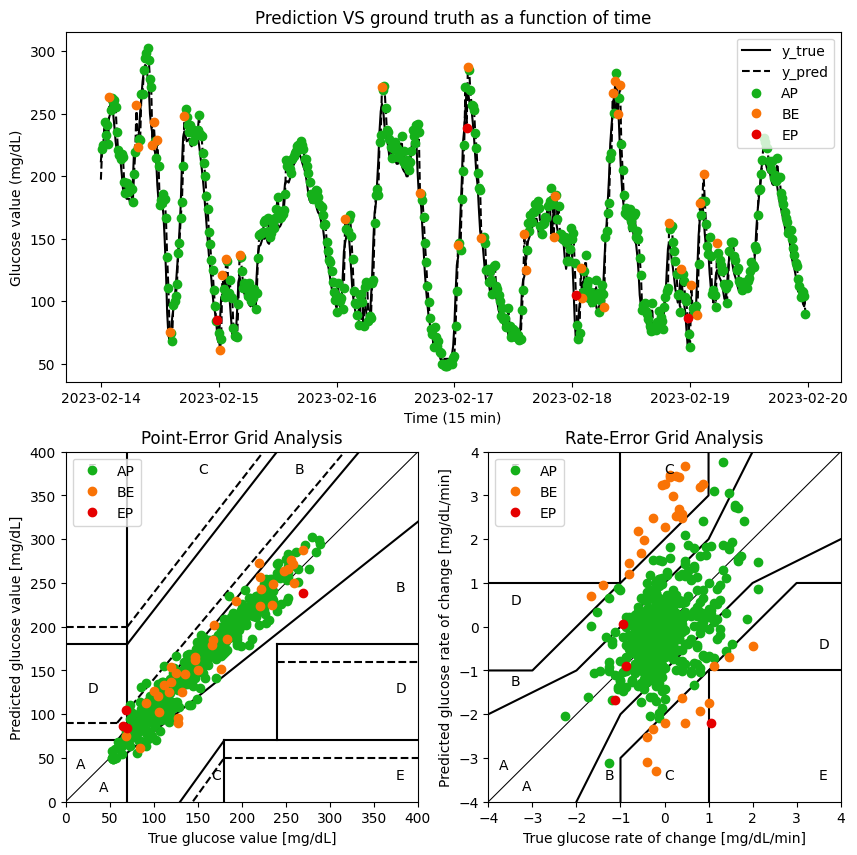

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 11ms/step


Glucose level Predict  Glucose level True
0               0.308042            0.261858
1               0.271338            0.229051
2               0.243694            0.196245
3               0.207759            0.163439
4               0.183756            0.130632

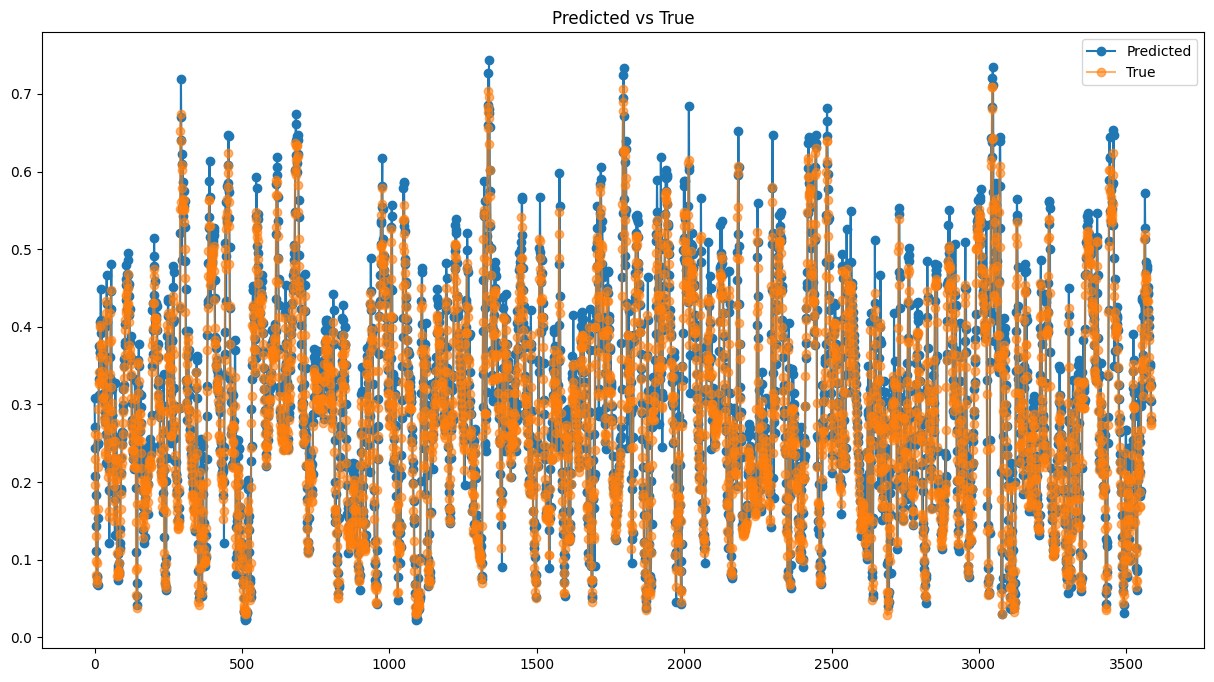

{'mae': 0.03645436026578892,
 'mse': 0.04840740687667429,
 'rmse': 0.002343277040523893}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

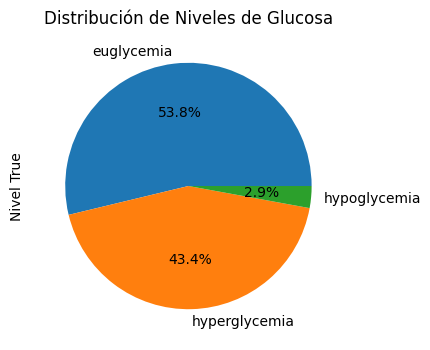

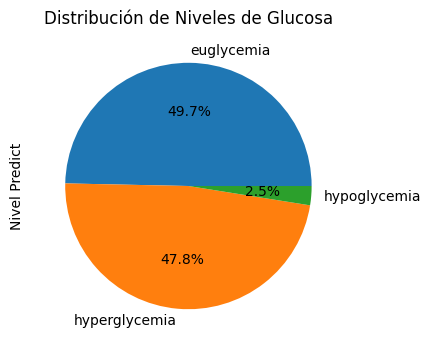

Glucose level True  Nivel True  Glucose level Predict  Nivel Predict
0          160.454545  euglycemia             181.699341  hyperglycemia
1          145.363636  euglycemia             164.815598     euglycemia
2          130.272727  euglycemia             152.099304     euglycemia
3          115.181818  euglycemia             135.568924     euglycemia
4          100.090909  euglycemia             124.527817     euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


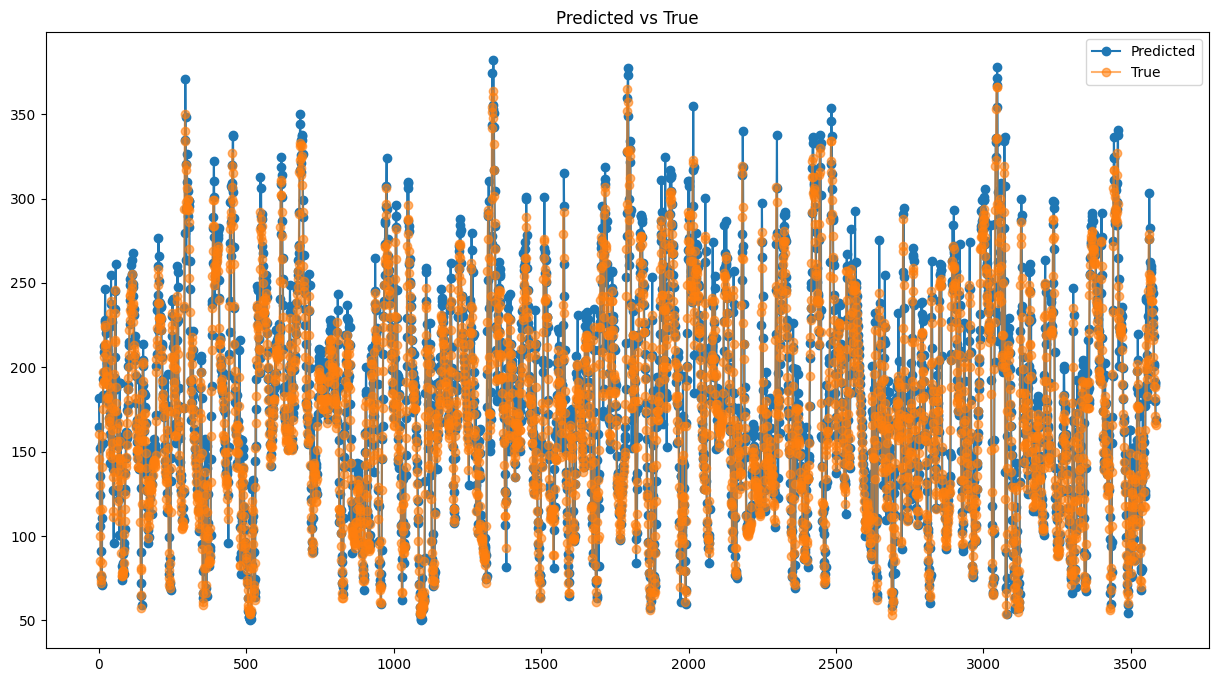

{'mae': 16.769005792887594,
 'mse': 22.26740687049722,
 'rmse': 495.8374087362668}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  181.699341
2023-01-01 00:15:00  145.363636  164.815598
2023-01-01 00:30:00  130.272727  152.099304
2023-01-01 00:45:00  115.181818  135.568924
2023-01-01 01:00:00  100.090909  124.527817
...                         ...         ...
2023-02-07 07:15:00  188.000000  191.460510
2023-02-07 07:30:00  182.000000  190.757385
2023-02-07 07:45:00  171.000000  189.388275
2023-02-07 08:00:00  167.000000  180.033142
2023-02-07 08:15:00  166.000000  168.825729

[3586 rows x 2 columns]

AP, BE, EP: (0.8719665271966527, 0.0898186889818689, 0.03821478382147838)


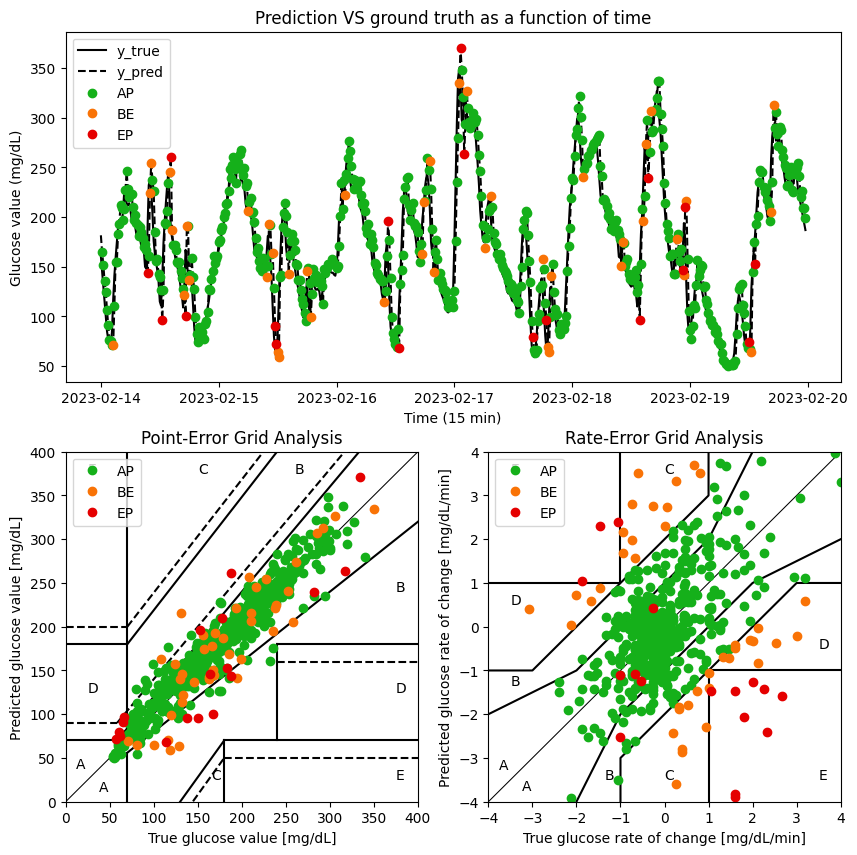

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 3s 15ms/step


Glucose level Predict  Glucose level True
0               0.550125            0.534783
1               0.559794            0.500000
2               0.541507            0.484783
3               0.476233            0.463043
4               0.497700            0.428261

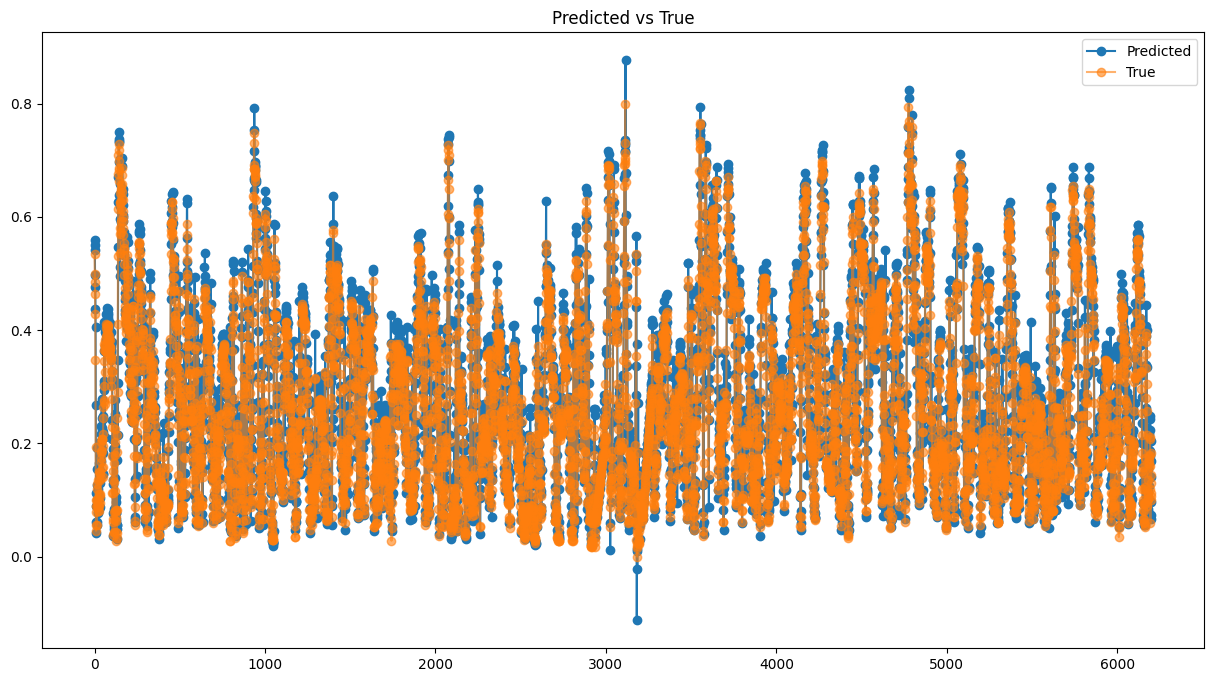

{'mae': 0.0391926900492842,
 'mse': 0.05408064610540505,
 'rmse': 0.0029247162831780625}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

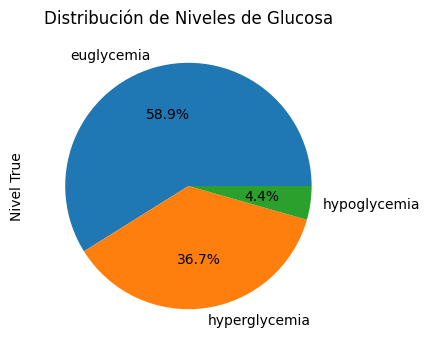

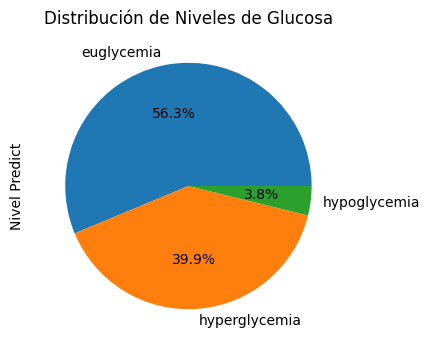

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             293.057281  hyperglycemia
1               270.0  hyperglycemia             297.505096  hyperglycemia
2               263.0  hyperglycemia             289.093384  hyperglycemia
3               253.0  hyperglycemia             259.067047  hyperglycemia
4               237.0  hyperglycemia             268.942047  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


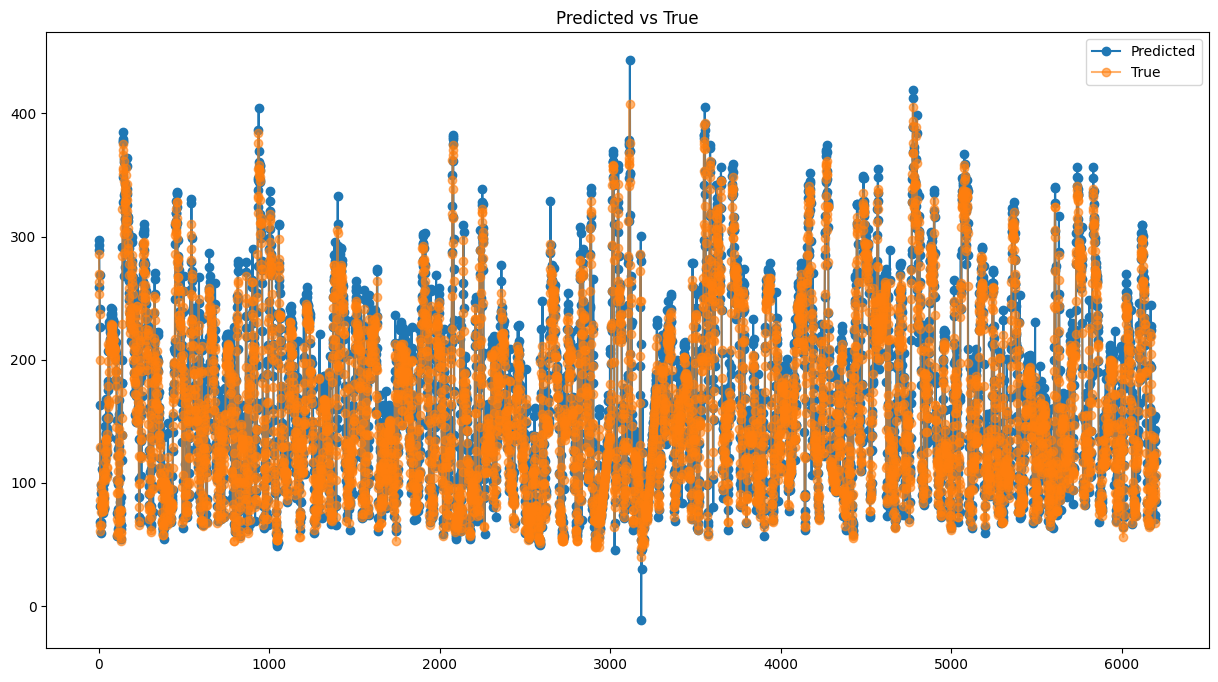

{'mae': 18.028637437439727,
 'mse': 24.877097335283448,
 'rmse': 618.8699718291668}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  293.057281
2023-01-01 00:15:00   270.0  297.505096
2023-01-01 00:30:00   263.0  289.093384
2023-01-01 00:45:00   253.0  259.067047
2023-01-01 01:00:00   237.0  268.942047
...                     ...         ...
2023-03-06 13:00:00   100.0   70.938850
2023-03-06 13:15:00    89.0  134.358612
2023-03-06 13:30:00    92.0  105.131012
2023-03-06 13:45:00   106.0   84.381950
2023-03-06 14:00:00   124.0  117.665222

[6201 rows x 2 columns]

AP, BE, EP: (0.8262903225806452, 0.12241935483870968, 0.05129032258064516)


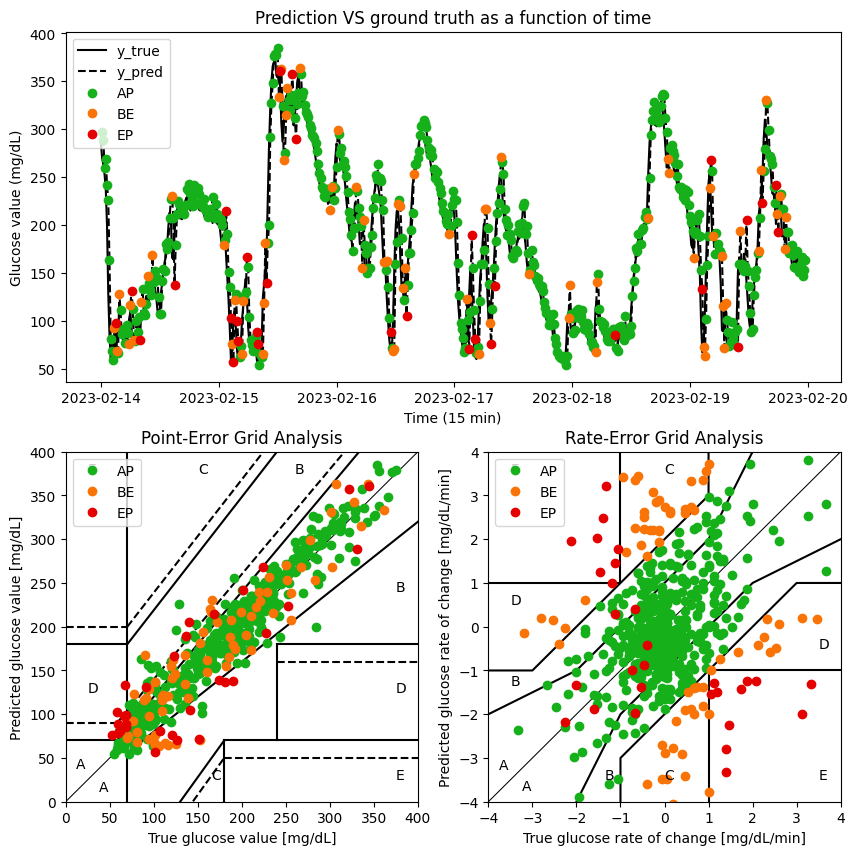

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)